<a href="https://colab.research.google.com/github/lathamithu/LSTM_Covid19/blob/master/LSTM_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import plotly as py
import plotly.express as px

In [0]:
df = pd.read_csv('covid_19_data_2.csv')
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [0]:
df.shape

(5890, 8)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5890 entries, 0 to 5889
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              5890 non-null   int64  
 1   ObservationDate  5890 non-null   object 
 2   Province/State   3575 non-null   object 
 3   Country/Region   5890 non-null   object 
 4   Last Update      5890 non-null   object 
 5   Confirmed        5890 non-null   float64
 6   Deaths           5890 non-null   float64
 7   Recovered        5890 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 368.2+ KB


In [0]:
df.isnull().sum()

SNo                   0
ObservationDate       0
Province/State     2315
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [0]:
nan_states_df = df[df['Province/State'].isnull()]

print('nan_states_df shape is : '+ str(nan_states_df.shape))
print('nan_states_df has got : '+ str(nan_states_df['Country/Region'].nunique()) + ' unique Country/Region values')

nan_states_df = nan_states_df[['ObservationDate','Country/Region','Confirmed','Deaths','Recovered']]
nan_states_df.head()

nan_states_df shape is : (2315, 8)
nan_states_df has got : 155 unique Country/Region values


,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
35,01/22/2020,Japan,2.0,0.0,0.0
36,01/22/2020,Thailand,2.0,0.0,0.0
37,01/22/2020,South Korea,1.0,0.0,0.0
73,01/23/2020,Japan,1.0,0.0,0.0
74,01/23/2020,Thailand,3.0,0.0,0.0


In [0]:
states_df = df[df['Province/State'].notnull()]

print('states_df shape is : '+ str(states_df.shape))
print('states_df has got : '+ str(states_df['Province/State'].nunique()) + ' unique Province/State values')
 
states_df = states_df[['ObservationDate','Province/State','Country/Region','Confirmed','Deaths','Recovered']]
states_df.head()

states_df shape is : (3575, 8)
states_df has got : 265 unique Province/State values


,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0


In [0]:
concentrated_states_df= states_df.groupby(['ObservationDate','Country/Region'])[['Confirmed','Deaths','Recovered']].sum().reset_index()
concentrated_states_df.head()

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,01/22/2020,Hong Kong,0.0,0.0,0.0
1,01/22/2020,Macau,1.0,0.0,0.0
2,01/22/2020,Mainland China,547.0,17.0,28.0
3,01/22/2020,Taiwan,1.0,0.0,0.0
4,01/22/2020,US,1.0,0.0,0.0


In [0]:
full_countries_df = pd.concat([nan_states_df, concentrated_states_df], axis=0).reset_index()
full_countries_df.head()

,index,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,35,01/22/2020,Japan,2.0,0.0,0.0
1,36,01/22/2020,Thailand,2.0,0.0,0.0
2,37,01/22/2020,South Korea,1.0,0.0,0.0
3,73,01/23/2020,Japan,1.0,0.0,0.0
4,74,01/23/2020,Thailand,3.0,0.0,0.0


In [0]:
lastest_full_countries_df = full_countries_df.groupby(['Country/Region'])[['ObservationDate','Confirmed','Deaths','Recovered']].max().reset_index()
lastest_full_countries_df.head()

,Country/Region,ObservationDate,Confirmed,Deaths,Recovered
0,Azerbaijan,02/28/2020,1.0,0.0,0.0
1,"('St. Martin',)",03/10/2020,2.0,0.0,0.0
2,Afghanistan,03/15/2020,16.0,0.0,0.0
3,Albania,03/15/2020,42.0,1.0,0.0
4,Algeria,03/15/2020,48.0,4.0,12.0


In [0]:
print('Total countries affected by covid virus: ' + str(lastest_full_countries_df['Country/Region'].nunique()) )

Total countries affected by covid virus: 161


In [0]:
print('Worldwide Confirmed Cases: ',lastest_full_countries_df['Confirmed'].sum())
print('Worldwide Deaths: ',lastest_full_countries_df['Deaths'].sum())
print('Worldwide Recovered Cases: ',lastest_full_countries_df['Recovered'].sum())

Worldwide Confirmed Cases:  167544.0
Worldwide Deaths:  6441.0
Worldwide Recovered Cases:  76041.0


In [0]:
lastest_full_countries_df.sort_values(by='Confirmed', ascending=False)
sorted_lastest_full_countries_df = lastest_full_countries_df.sort_values(by='Confirmed', ascending=False)
sorted_lastest_full_countries_df.head()

,Country/Region,ObservationDate,Confirmed,Deaths,Recovered
90,Mainland China,03/15/2020,80848.0,3199.0,66926.0
74,Italy,03/15/2020,24747.0,1809.0,2335.0
70,Iran,03/15/2020,13938.0,724.0,4590.0
137,South Korea,03/15/2020,8162.0,75.0,510.0
138,Spain,03/15/2020,7798.0,289.0,517.0


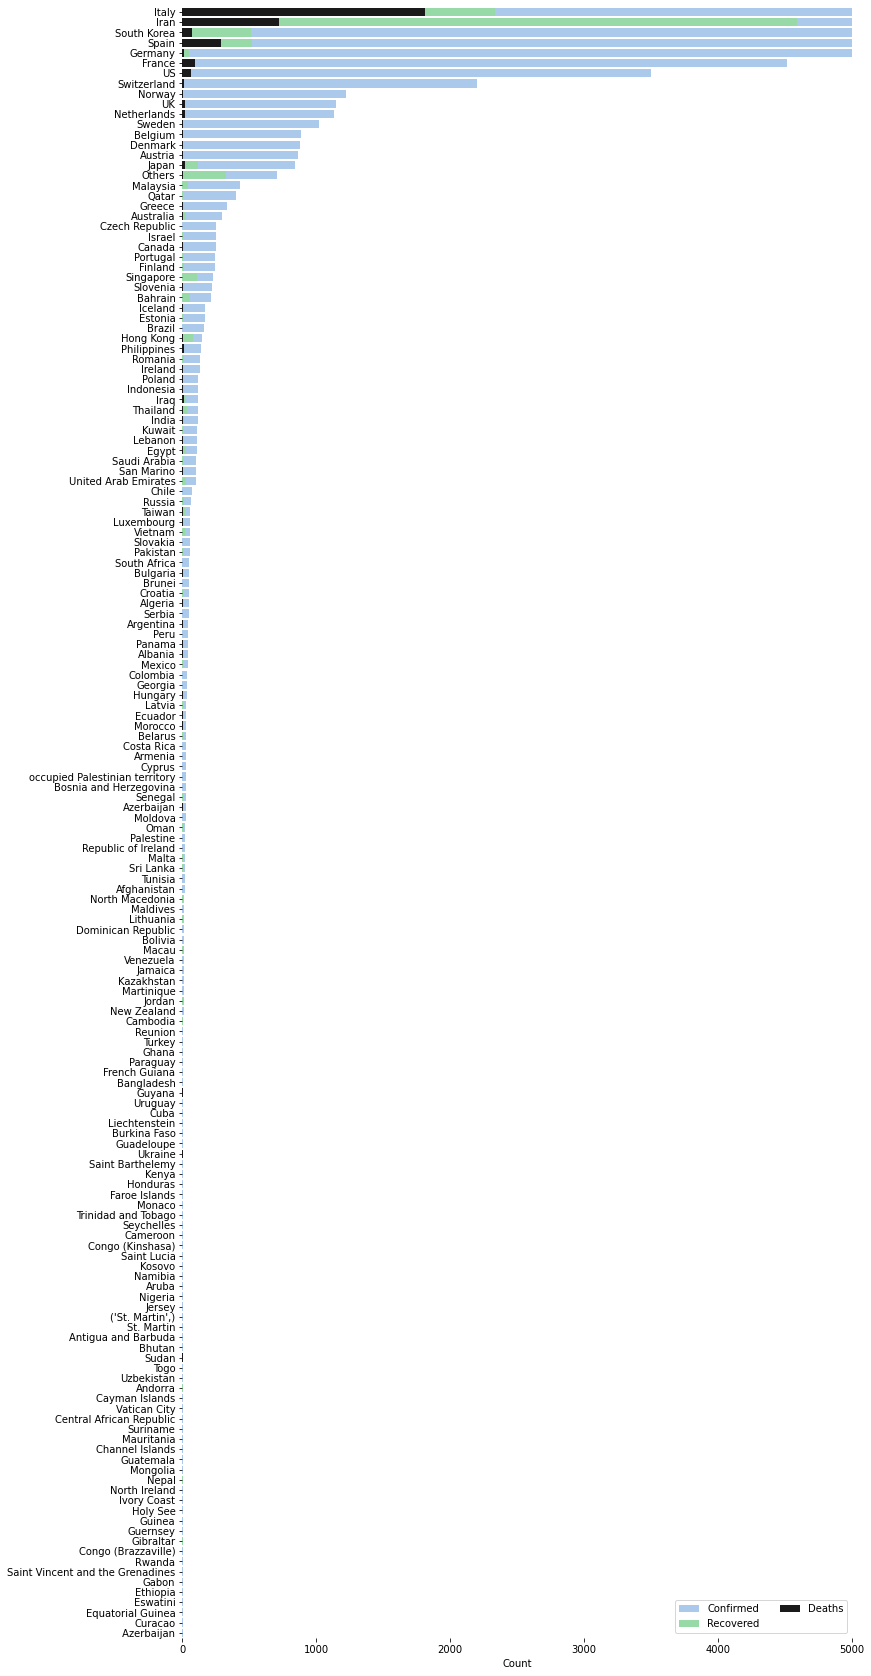

In [0]:
f, ax = plt.subplots(figsize=(12, 30))

sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="Country/Region", data=sorted_lastest_other_countries_df[:],
            label="Confirmed", color="b")

sns.set_color_codes("pastel")
sns.barplot(x="Recovered", y="Country/Region", data=sorted_lastest_other_countries_df[:],
            label="Recovered", color="g")

sns.set_color_codes("pastel")
sns.barplot(x="Deaths", y="Country/Region", data=sorted_lastest_other_countries_df[:],
            label="Deaths", color="k")


ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 5000), ylabel="",
       xlabel="Count")
sns.despine(left=True, bottom=True)

In [0]:
sorted_lastest_full_countries_df[(sorted_lastest_full_countries_df['Confirmed'] == sorted_lastest_full_countries_df['Recovered'])]

,Country/Region,ObservationDate,Confirmed,Deaths,Recovered
89,Macau,03/15/2020,10.0,0.0,10.0
5,Andorra,03/15/2020,1.0,0.0,1.0
102,Nepal,03/15/2020,1.0,0.0,1.0
56,Gibraltar,03/10/2020,1.0,0.0,1.0


In [0]:
sorted_lastest_full_countries_df[(sorted_lastest_full_countries_df['Confirmed'] == sorted_lastest_full_countries_df['Deaths'])]

,Country/Region,ObservationDate,Confirmed,Deaths,Recovered
141,Sudan,03/15/2020,1.0,1.0,0.0


In [0]:
sorted_lastest_full_countries_df[(sorted_lastest_full_countries_df['Recovered'] < sorted_lastest_full_countries_df['Deaths'])]

,Country/Region,ObservationDate,Confirmed,Deaths,Recovered
50,France,03/15/2020,4513.0,91.0,12.0
152,US,03/15/2020,3499.0,63.0,12.0
144,Switzerland,03/15/2020,2200.0,14.0,4.0
108,Norway,03/15/2020,1221.0,3.0,1.0
151,UK,03/15/2020,1144.0,21.0,19.0
103,Netherlands,03/15/2020,1135.0,20.0,2.0
143,Sweden,03/15/2020,1022.0,3.0,1.0
16,Belgium,03/15/2020,886.0,4.0,1.0
40,Denmark,03/15/2020,875.0,2.0,1.0
135,Slovenia,03/15/2020,219.0,1.0,0.0


In [0]:
fig = px.choropleth(full_countries_df, 
                    locations="Country/Region", 
                    locationmode = "country names",
                    color="Confirmed",
                    hover_name="Country/Region", 
                    animation_frame="ObservationDate"
                   )

fig.update_layout(
    title_text = 'Spread of Coronavirus',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))
    
fig.show()

In [0]:
dff = pd.read_csv('covid_19_data_2.csv')
daily_count = dff.groupby('ObservationDate').Confirmed.count()
daily_count = pd.DataFrame(daily_count)
daily_count

,Confirmed
ObservationDate,
01/22/2020,38
01/23/2020,46
01/24/2020,41
01/25/2020,44
01/26/2020,47
01/27/2020,51
01/28/2020,52
01/29/2020,54
01/30/2020,58


In [0]:
data = daily_count.cumsum()
data 

,Confirmed
ObservationDate,
01/22/2020,38
01/23/2020,84
01/24/2020,125
01/25/2020,169
01/26/2020,216
01/27/2020,267
01/28/2020,319
01/29/2020,373
01/30/2020,431


In [0]:
dataset = data.iloc[14:]
dataset.columns = ['Confirmed']
data = np.array(dataset).reshape(-1, 1)
train_data = dataset[:len(dataset)-5]
test_data = dataset[len(dataset)-5:]
train_data

,Confirmed
ObservationDate,
02/05/2020,836
02/06/2020,907
02/07/2020,979
02/08/2020,1051
02/09/2020,1123
02/10/2020,1195
02/11/2020,1268
02/12/2020,1341
02/13/2020,1415


In [0]:
test_data

,Confirmed
ObservationDate,
03/11/2020,4935
03/12/2020,5153
03/13/2020,5383
03/14/2020,5632
03/15/2020,5890


In [0]:
scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)
scaled_train_data

array([[0.        ],
       [0.01828483],
       [0.0368272 ],
       [0.05536956],
       [0.07391192],
       [0.09245429],
       [0.11125418],
       [0.13005408],
       [0.14911151],
       [0.16842647],
       [0.18774144],
       [0.2070564 ],
       [0.22637136],
       [0.24568633],
       [0.26525882],
       [0.28483132],
       [0.30646407],
       [0.32809683],
       [0.34998712],
       [0.37316508],
       [0.39737317],
       [0.42338398],
       [0.45042493],
       [0.47978367],
       [0.51043008],
       [0.54262168],
       [0.57893381],
       [0.61782127],
       [0.65902653],
       [0.70357971],
       [0.75482874],
       [0.81277363],
       [0.8784445 ],
       [0.94694824],
       [1.        ]])

In [0]:
scaled_test_data

array([[1.05562709],
       [1.11176925],
       [1.1710018 ],
       [1.23512748],
       [1.30157095]])

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
n_input =3
n_features =1
                             
generator = TimeseriesGenerator(scaled_train_data,scaled_train_data, length=n_input, batch_size=1)

lstm_model = Sequential()
lstm_model.add(LSTM(19, activation='relu', input_shape = (n_input, n_features)))
lstm_model.add(Dense(10))
lstm_model.add(Dense(5))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_23 (LSTM)               (None, 19)                1596      
_________________________________________________________________
dense_69 (Dense)             (None, 10)                200       
_________________________________________________________________
dense_70 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 6         
Total params: 1,857
Trainable params: 1,857
Non-trainable params: 0
_________________________________________________________________


In [0]:
lstm_model.fit_generator(generator, epochs=28)

Epoch 1/28
32/32 [==============================] - 0s 2ms/step - loss: 0.2050
Epoch 2/28
32/32 [==============================] - 0s 2ms/step - loss: 0.1186
Epoch 3/28
32/32 [==============================] - 0s 3ms/step - loss: 0.0712
Epoch 4/28
32/32 [==============================] - 0s 2ms/step - loss: 0.0597
Epoch 5/28
32/32 [==============================] - 0s 2ms/step - loss: 0.0549
Epoch 6/28
32/32 [==============================] - 0s 2ms/step - loss: 0.0497
Epoch 7/28
32/32 [==============================] - 0s 2ms/step - loss: 0.0452
Epoch 8/28
32/32 [==============================] - 0s 2ms/step - loss: 0.0373
Epoch 9/28
32/32 [==============================] - 0s 2ms/step - loss: 0.0262
Epoch 10/28
32/32 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 11/28
32/32 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 12/28
32/32 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 13/28
32/32 [==============================

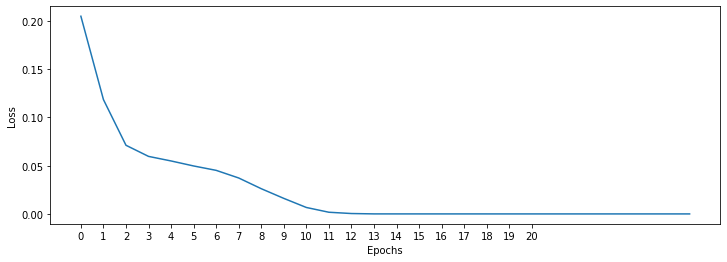

In [0]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize = (12,4))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)), losses_lstm)

In [0]:
lstm_predictions_scaled = []

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

lstm_predictions_scaled

[array([1.0583373], dtype=float32),
 array([1.1149298], dtype=float32),
 array([1.1695486], dtype=float32),
 array([1.2260009], dtype=float32),
 array([1.283427], dtype=float32)]

In [0]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled) 
lstm_predictions

array([[4945.52385557],
       [5165.27239501],
       [5377.35733306],
       [5596.56151426],
       [5819.54704118]])

In [0]:
test_data['LSTM_Predictions'] = lstm_predictions
test_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Confirmed,LSTM_Predictions
ObservationDate,,
03/11/2020,4935,4945.523856
03/12/2020,5153,5165.272395
03/13/2020,5383,5377.357333
03/14/2020,5632,5596.561514
03/15/2020,5890,5819.547041


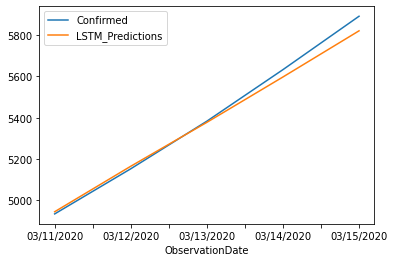

In [0]:
test_data.plot()

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('MAE of LSTM Model : ',mean_absolute_error(test_data['Confirmed'], test_data['LSTM_Predictions']))

print('MSE of LSTM Model : ',mean_squared_error(test_data['Confirmed'], test_data['LSTM_Predictions']))

MAE of LSTM Model :  26.86607241630609
MSE of LSTM Model :  1302.5417168022625
